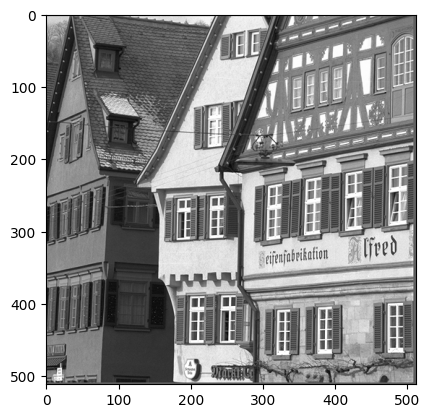

In [19]:
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("/content/houses.bmp")
plt.imshow(img)

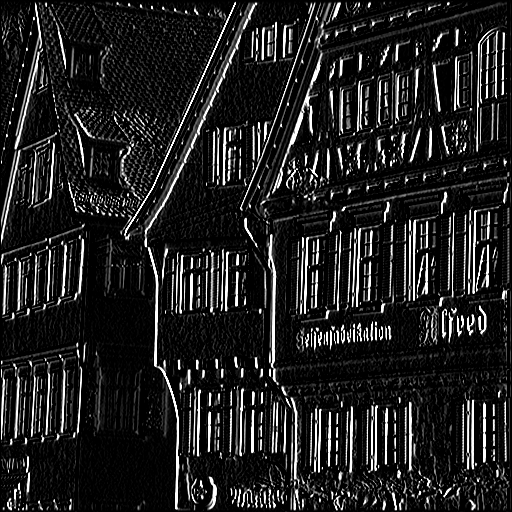

In [20]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
img1 = cv2.filter2D(img, -1, sobel_x)

cv2_imshow(img1)

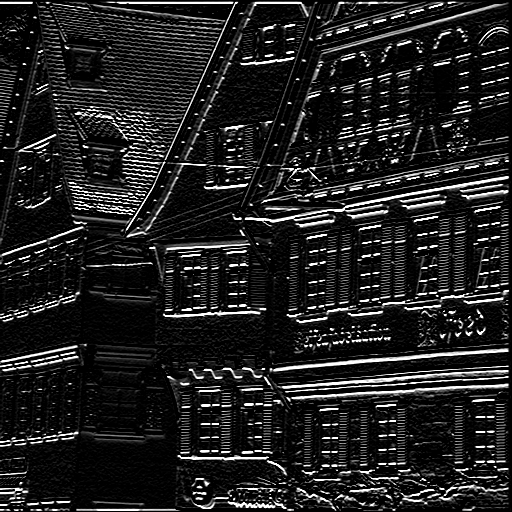

In [21]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
img2 = cv2.filter2D(img, -1, sobel_y)

cv2_imshow(img2)

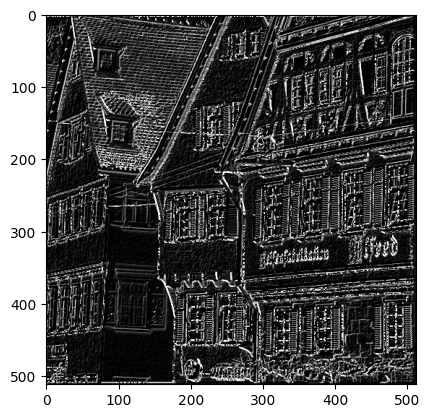

In [22]:
final_sobelimg=img1+img2
plt.imshow(final_sobelimg,cmap='grey')

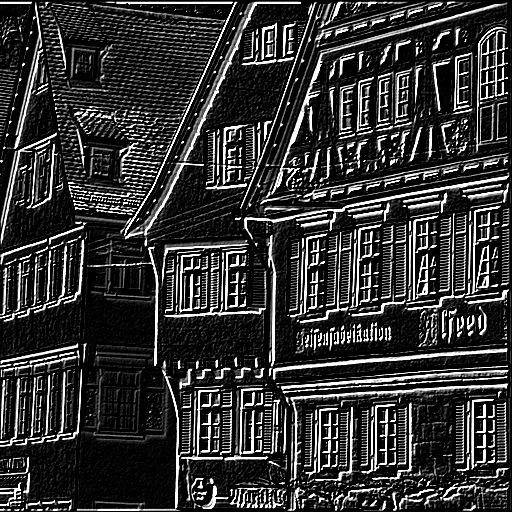

In [24]:
img3= cv2.imread("/content/houses.bmp")
finalsobel = sobel_x + sobel_y
img3 = cv2.filter2D(img3, -1, finalsobel)
cv2_imshow(img3)

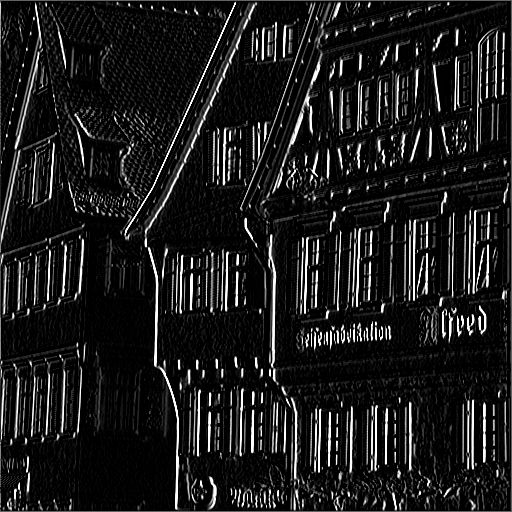

In [23]:
def imageFiltering(image, kernel):
    linkernal = kernel.reshape(-1)
    newimg = image.copy()
    for x in range(1, len(image) - 1):
        for y in range(1, len(image[0]) - 1):

            elements = image[x-1:x+2, y-1:y+2].reshape(-1)
            conv_sum = 0
            for i in range(len(elements)):
                conv_sum += elements[i] * linkernal[i]

            newimg[x][y] = np.clip(conv_sum, 0, 255)
    return newimg

img4 = cv2.imread('/content/houses.bmp', cv2.IMREAD_GRAYSCALE)

if img4 is None:
    raise ValueError("Image not found or unable to load. Check the file path.")

matrix_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

resimg = imageFiltering(img4, matrix_x)

cv2_imshow(resimg)